### This is an example for linear regression and tensorflow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
X = np.arange(0.0, 5.0, 0.1)

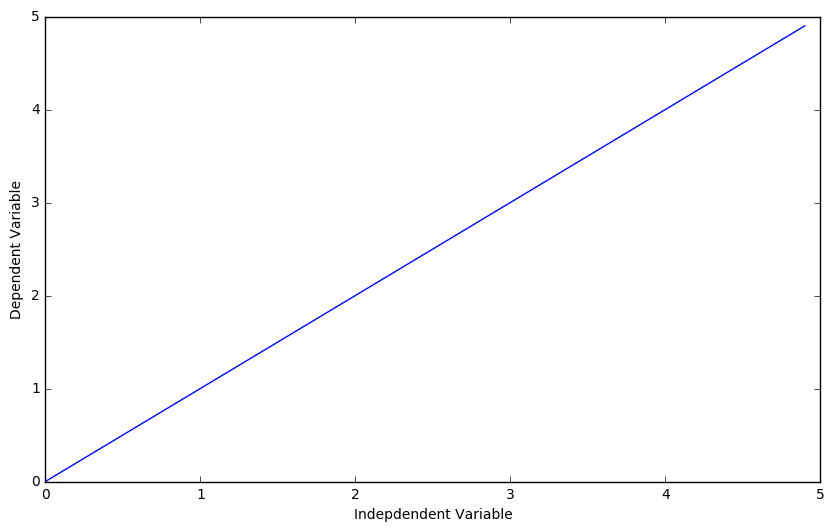

In [3]:
a=1
b=0

Y= a*X + b 

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Let us simulate little bit more complicated example

In [4]:
x_data = np.random.rand(100).astype(np.float32)

In [5]:
x_data

array([ 0.98637801,  0.56503493,  0.72628999,  0.65897316,  0.46704942,
        0.16321974,  0.50917101,  0.13169289,  0.43793875,  0.25988913,
        0.18107727,  0.6307835 ,  0.54349452,  0.49696308,  0.63835865,
        0.14133713,  0.73646063,  0.43523502,  0.98611426,  0.97820109,
        0.69362116,  0.08088885,  0.76170897,  0.70076895,  0.39422932,
        0.9654209 ,  0.86160672,  0.66022074,  0.04501721,  0.85138088,
        0.91622424,  0.06165198,  0.44964358,  0.08240177,  0.53283978,
        0.89101893,  0.60193139,  0.07608474,  0.9758603 ,  0.95267874,
        0.70107824,  0.84371692,  0.68353057,  0.67794704,  0.5984208 ,
        0.65283436,  0.83729941,  0.22275275,  0.1283583 ,  0.10167184,
        0.05845502,  0.10192334,  0.57645708,  0.04390731,  0.92907888,
        0.93235314,  0.28107354,  0.85553175,  0.2783511 ,  0.73824149,
        0.96139568,  0.24437468,  0.16878258,  0.32856593,  0.43480247,
        0.33201289,  0.57980877,  0.25152272,  0.32003558,  0.04

In [6]:
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

In [16]:
z = [(x_data[i],y_data[i]) for i in range(len(x_data))]

In [18]:
z[0:5]

[(0.98637801, 4.9117246805176933),
 (0.56503493, 3.607958386488249),
 (0.72628999, 4.1199720752864923),
 (0.65897316, 4.1333018864088702),
 (0.46704942, 3.2884040654698588)]

In [19]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In [20]:
loss = tf.reduce_mean(tf.square(y - y_data))

In [21]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [28]:
init = tf.global_variables_initializer()
train_data = []
with tf.Session() as sess:
    sess.run(init)
    for step in range(100):
        evals = sess.run([train,a,b])[1:]
        if step % 5 == 0:
            print(step, evals)
            train_data.append(evals)

0 [2.7669842, 3.1003258]
5 [2.5437481, 2.2689731]
10 [2.6856029, 2.1890395]
15 [2.7857082, 2.1302688]
20 [2.8570905, 2.0883691]
25 [2.9079885, 2.0584934]
30 [2.9442804, 2.0371909]
35 [2.9701576, 2.0220015]
40 [2.9886091, 2.0111711]
45 [3.0017655, 2.0034485]
50 [3.0111468, 1.997942]
55 [3.0178361, 1.9940156]
60 [3.0226057, 1.9912161]
65 [3.0260067, 1.9892198]
70 [3.0284314, 1.9877964]
75 [3.0301604, 1.9867815]
80 [3.0313933, 1.9860579]
85 [3.0322723, 1.9855418]
90 [3.0328989, 1.9851741]
95 [3.0333459, 1.9849117]


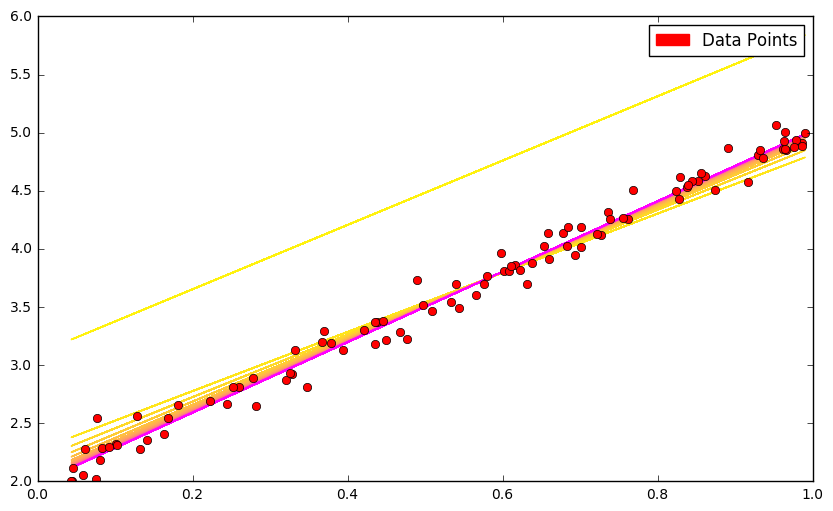

In [29]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

In [30]:
converter

<function matplotlib.pyplot.colors>

In [38]:
import pandas as pd